# Выявление определяющих успешность игры закономерностей

**Описание проекта:**

Работа выполняется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы:**

- Обзор данных

- Подготовка данных

- Исследовательский анализ 

- Составление портрета пользователя каждого региона

- Проверка гипотез

- Вывод

## Обзор данных

In [19]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('/datasets/games.csv')
df.head(10) # просматриваю первые 10 строк с помощью head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [21]:
df.info() # узнаю общуую информацию по датасету с помощью info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<!-- Название стобцов нужно привести к нижнему регистру, есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, -->

Нужно привести все названия столбцов к нижнему регистру. Есть пропуски в атрибутах Name, Year_of_Release, Critic_Score, User_Score, Rating. Так же нужно заменить тип столбца User_Score u Year_of_Release

In [22]:
# Найдем дубликаты
df.duplicated().sum() # узнаю количество дубликатов с помощью duplicated() и суммирую их с помощью sum()

0

Явных дубликатов нет

## Подготовка данных к анализу

In [23]:
# Изменим регистр названий столбцов
df.columns = df.columns.str.lower() # изменяю регистр на нижний с помощью str.lower()
df.columns # проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [24]:
# Изменим тип данных в столбце year_of_release, для этого сначало удалим в нем пропуски, их мало.
df.dropna(subset=['year_of_release'], inplace = True) # Удаляю пропуски с поиощью dropna()
df = df.reset_index(drop=True) # Возвращаю нормальную индексацию
df['year_of_release'] = df['year_of_release'].astype(int) # Меняю тип с помощью astype() на int
df # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
# Посмотрим на соотнешение пропусков 
df.isna().mean() # узнаю соотношение пропусков с помощью isna().mean()

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.401739
rating             0.406056
dtype: float64

Удалим строки в которых есть пропуски в name. Пропуски в столбцах critic_score, user_score и rating связаны скорее всего либо с годом выхода(раньше общедоступные оценки играм дать было сложно) либо с тем, что игра новая и оценок для нее еще нет, их  мы удалить не можем, и обработав их, мы исказим исследование. Пропуски в rating попробуем обработать.

In [26]:
# Удаляю пропуски в name, так же, как делал это с year_of_release
df.dropna(subset=['name'], inplace = True)
df = df.reset_index(drop=True)
df # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
# Узнаем все уникальные значения user_score
print(df['user_score'].unique()) # узнаю все уникальные значения с помощью unique()
# Так как в user_score встречается tbd(еще невыставленный рейтинг) заменим его на NaN
df['user_score'].loc[df['user_score'] == 'tbd'] = np.nan # нахожу tbd с помощью loc и  заменяю  на nan с помощью np.nan
# Изменим тип данных в столбце user_score
df['user_score'] = df['user_score'].astype(float) 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [28]:
# Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sum_sales'].head(10) # проверка

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: sum_sales, dtype: float64

In [29]:
# Узнаем какие есть значения у столбца rating и сколько каждого из них
df.pivot_table(index='rating', values='name', aggfunc='count')

,name
rating,
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905


Будет логично заменить категории AO, EC, K-A на other и дать пропускам значение RP((«Rating Pending») — «Рейтинг ожидается»)

In [30]:
df.loc[df['rating'] == 'AO', 'rating'] = 'other' # использую loc для замены значений
df.loc[df['rating'] == 'EC', 'rating'] = 'other' 
df.loc[df['rating'] == 'K-A', 'rating'] = 'other'
df['rating'] = df['rating'].fillna('RP') # вставляю вместо пропусков RP
df['rating'].unique() # проверка 

array(['E', 'RP', 'M', 'T', 'E10+', 'other'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


##  Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

In [32]:
# Создадим сводную таблицу
years = df.pivot_table(index='year_of_release', values='name', aggfunc='count') # с помощью pivot_table создаю сводную таблицу
# уберем все неизвестные
years = years.query('year_of_release > 1')
years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


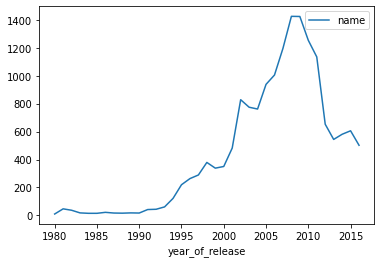

In [33]:
years.plot(); # создаю график с помощью plot()

Можно сделать вывод, что игры до 1995 года выходили не так часто.

Узнаем какие платформы были самые популярные за весь период

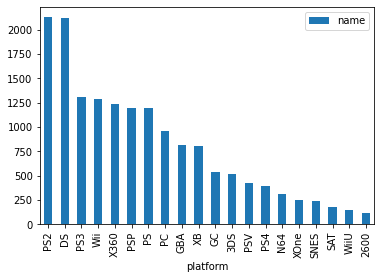

In [34]:
top20 = (df.pivot_table(index='platform', values='name', aggfunc='count')
 .sort_values('name', ascending=False).head(20))
top20.plot(kind='bar');
# создаю сводную таблицу, сортирую по убыванию количества выпущенных игр, создаю гоафик

Вот и наши 20 фаворитов. Посмотрим как они выпускали игры по годам.

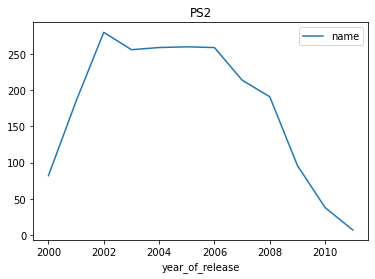

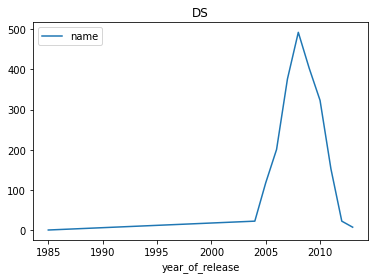

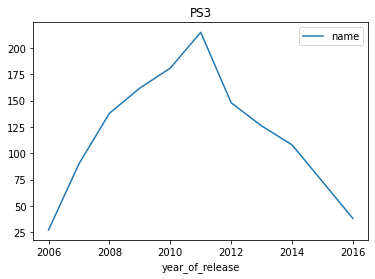

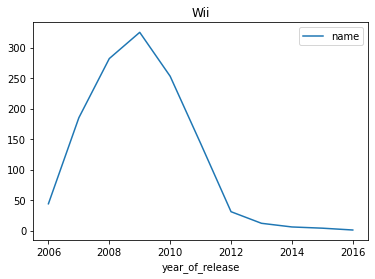

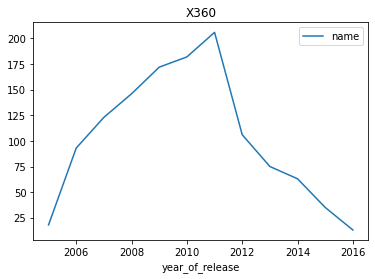

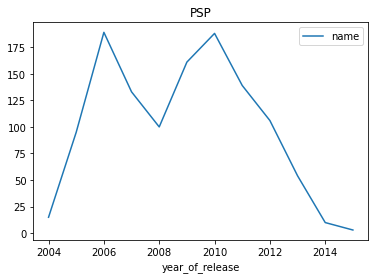

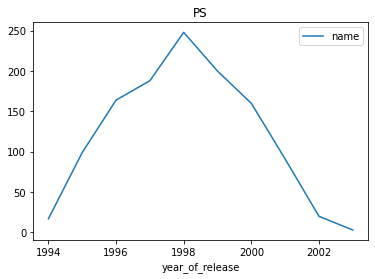

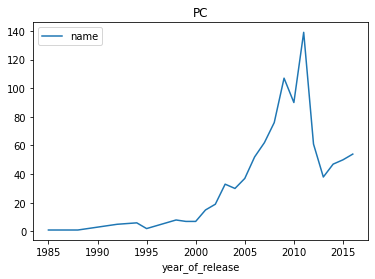

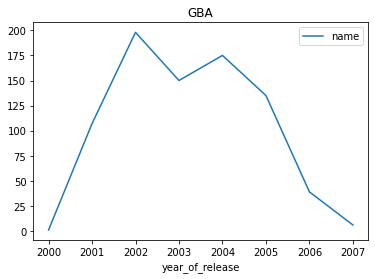

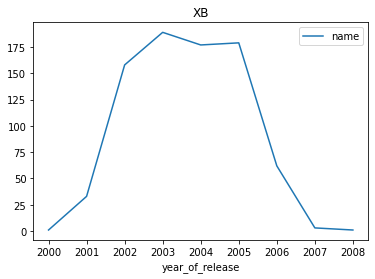

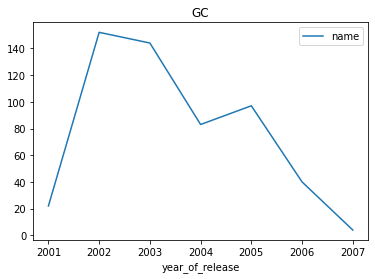

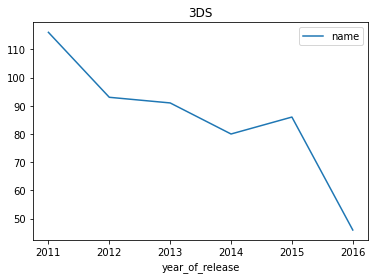

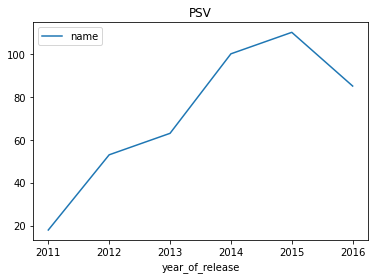

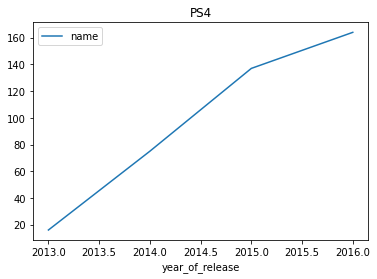

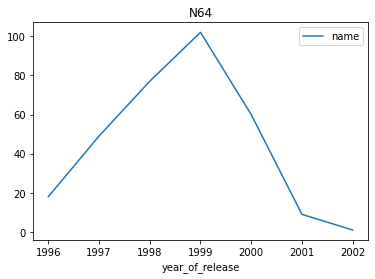

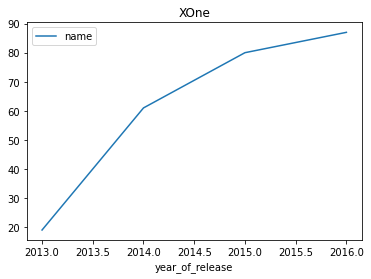

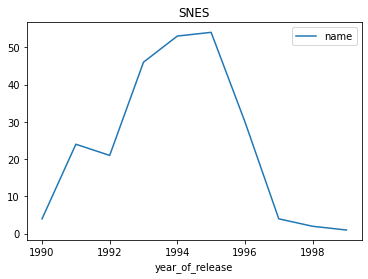

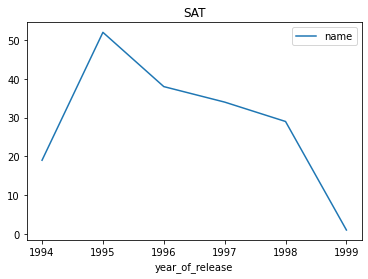

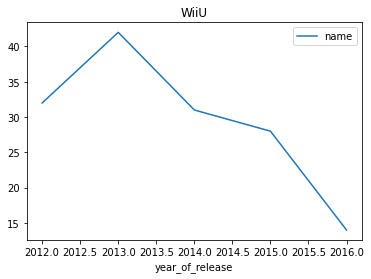

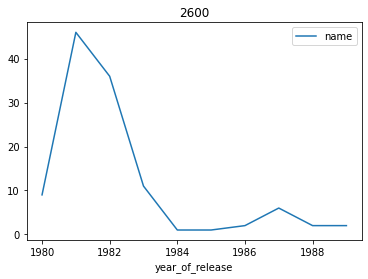

In [35]:
platforms = top20.index # создаю список с названием платформ c помощью индекса из прошлой сводной таблицы
for i in platforms: # создаю цикл для постройки графика для каждой платформы
    a = df.query('platform == @i')
    a.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(title=i)

Можно сделать вывод, что платформы сменяют друг друга примерно раз в 6 лет

Теперь найдем данные за актуальный период, в этот период входят платформы PS3, Wii, X360, 3DS, PSV, PS4, XOne, WiiU и PC так как лишь на них выходят игры во время 2016 год. Создадим датафрейм за актуальный период, который поможет построить прогноз на 2017 год. Уберем все игры до 2014 года и оставим лишь актуальные платформы.

In [36]:
# сделаем срез по этим платформам и нужным годам
actual_df = df.query('platform in ["PS3", "Wii", "X360", "PC", "3DS", "PSV", "PS4", "XOne", "WiiU"]').reset_index(drop=True)
actual_df = actual_df.query('year_of_release >= 2014').reset_index(drop=True)
actual_df 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1672,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1673,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1674,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


Найдем прибыль для каждой платформы по годам из обновленного датафрейма

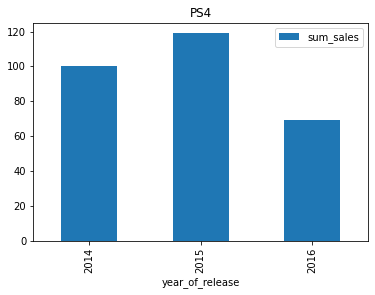

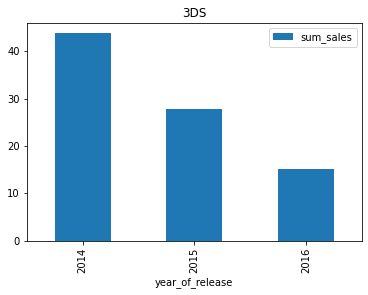

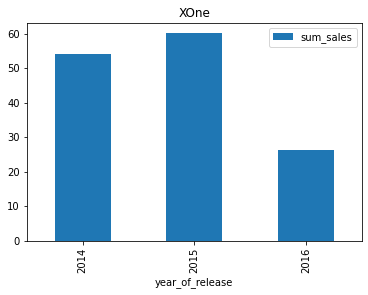

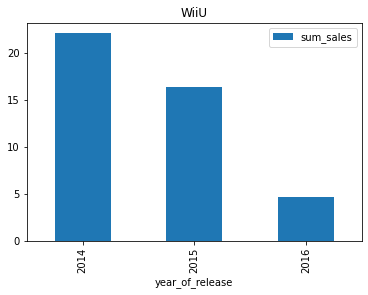

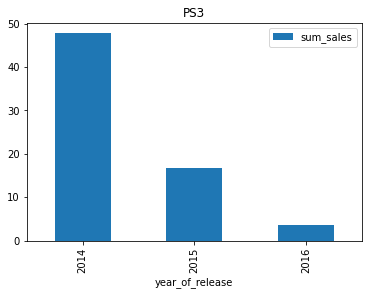

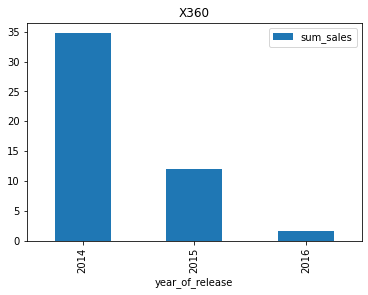

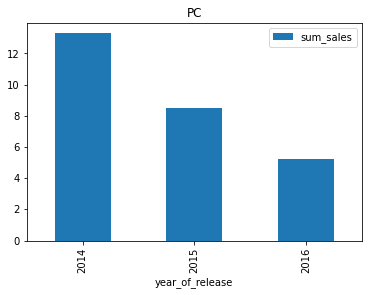

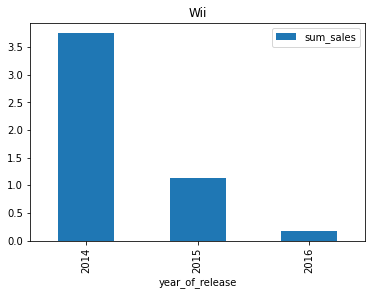

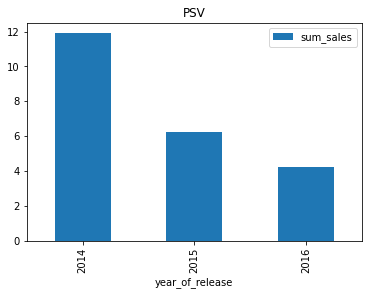

In [37]:
platforms = actual_df['platform'].unique() # создаю список всех платформ
for i in platforms: # прохожусь по всем платформам и строю графики с заработком по годам
    (actual_df.query('platform == @i')
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
     .plot(kind='bar', title=i))

Виден переход от старого покаления платформ к новому. По продажам пока лидируют PS3 и X360, но они падают и уступают места PS4 c XOne. Так же можно выделить 3DS и PC как платформы с хорошими продажами, особенно PC со своей 30-тилетней историей продаж.

Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам

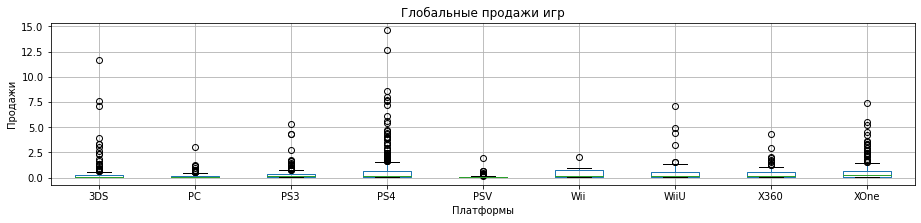

In [38]:
actual_df.boxplot('sum_sales', by='platform',figsize=(15,3))

plt.xlabel('Платформы')
plt.ylabel('Продажи')

plt.suptitle('')
plt.title('Глобальные продажи игр')

plt.show()

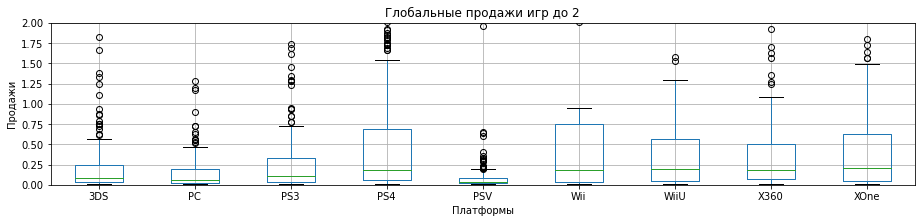

In [39]:
# Уменьшим масштаб
actual_df.boxplot('sum_sales', by='platform',figsize=(15,3)).set_ylim(0,2)

plt.xlabel('Платформы')
plt.ylabel('Продажи')

plt.suptitle('')
plt.title('Глобальные продажи игр до 2')

plt.show()

Некоторые платформы имеют средние продажи меньше 1, дальше 1.75 по средним продажам никто не зашел. Так же у каждой платформы есть скачки в несколько раз больше 4 квартиля. Кто-то может сказать, что это выбросы. Я так не считаю. Есть игры которые покупаются в разы больше остальных, они видимо и создают видимость выбросов. Реальные выбросы так не отследить. Можно выделить XOne и PS4, как самые перспективные платформы и PSV как самую бесперспективную.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем PS3.

In [40]:
# Создадим функцию для построения диаграммы рассеяния и подсчета корреляции между отзывами и продажами
def critic(platforms): # на вход дается название платформы
    a = actual_df.query('platform == @platforms')
    a.plot(x='critic_score', y='sum_sales', kind='scatter') # строю диаграмму рассеяния для отзывов критиков
    print('Корреляция с отзывами критиков ' + str(a['critic_score'].corr(a['sum_sales']))) # Считаю корреляцию с помощью corr
    a.plot(x='user_score', y='sum_sales', kind='scatter') # строю диаграмму рассеяния для отзвов пользователей
    print('Корреляция с отзывами пользователей ' + str(a['user_score'].corr(a['sum_sales'])))

Корреляция с отзывами критиков 0.44657460493190704
Корреляция с отзывами пользователей -0.16676141347662118


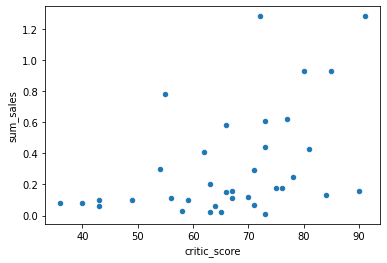

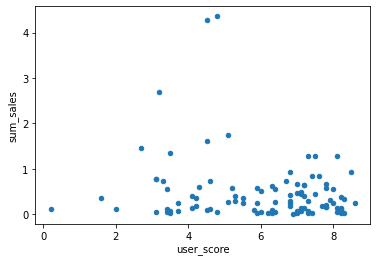

In [41]:
# Посмотрим на PS3
critic('PS3')

Корреляция с отзывами критиков 0.5257228356581523
Корреляция с отзывами пользователей -0.138444570945665


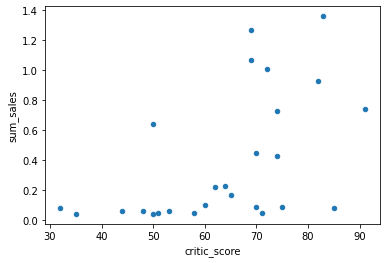

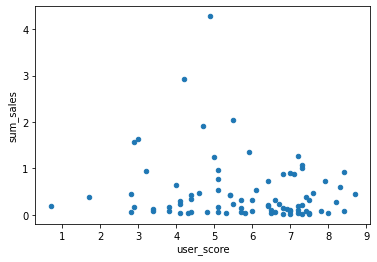

In [42]:
# Посмотрим на X360
critic('X360')

Корреляция с отзывами критиков 0.40266141068104083
Корреляция с отзывами пользователей -0.040131589472697356


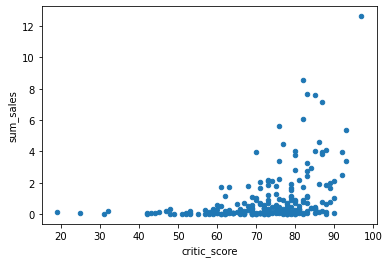

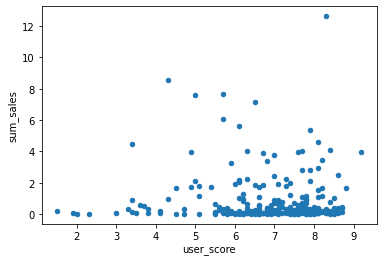

In [43]:
# Посмотрим на PS4
critic('PS4')

Корреляция с отзывами критиков 0.42867694370333226
Корреляция с отзывами пользователей -0.0703839280647581


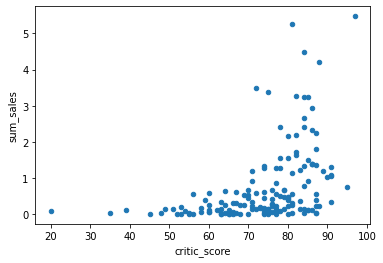

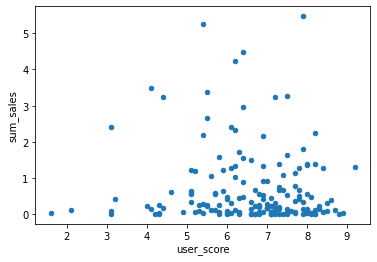

In [44]:
# Посмотрим на XOne
critic('XOne')

Можно сделать выводы, что от отзывов пользователей почти ничего не зависит, но от отзывы критиков имеют умеренную корреляцию.

Соотнесем результаты прошлых шагов с исследованиями по всем платформам сразу

Корреляция с отзывами критиков 0.328105086966363
Корреляция с отзывами пользователей -0.013070305002484585


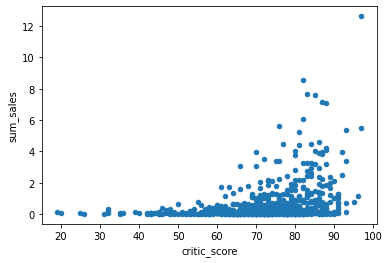

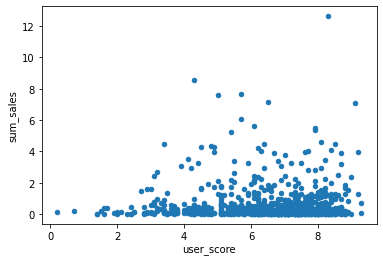

In [45]:
actual_df.plot(x='critic_score', y='sum_sales', kind='scatter') # строю диаграмму рассеяния для отзывов критиков
print('Корреляция с отзывами критиков ' + str(actual_df['critic_score'].corr(actual_df['sum_sales']))) # Считаю корреляцию с помощью corr
actual_df.plot(x='user_score', y='sum_sales', kind='scatter') # строю диаграмму рассеяния для отзвов пользователей
print('Корреляция с отзывами пользователей ' + str(actual_df['user_score'].corr(actual_df['sum_sales'])))

Можно сделать выводы, что отзывы пользователей не влияют на продаваемость игр, в отличии от отзывов критиков - они имеют умеренную корреляцию. Но точно сказать об этом в данном исследование мы не можем, т.к. есть нехватка данных.

Посмотрим на распределение продаж игр по жанрам

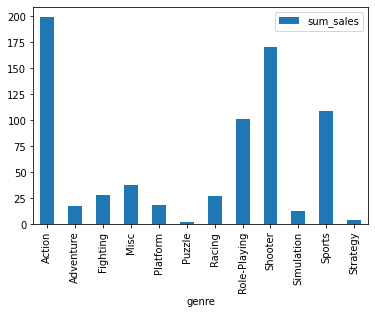

In [46]:
actual_df.pivot_table(index='genre', values='sum_sales', aggfunc='sum').plot(kind='bar');

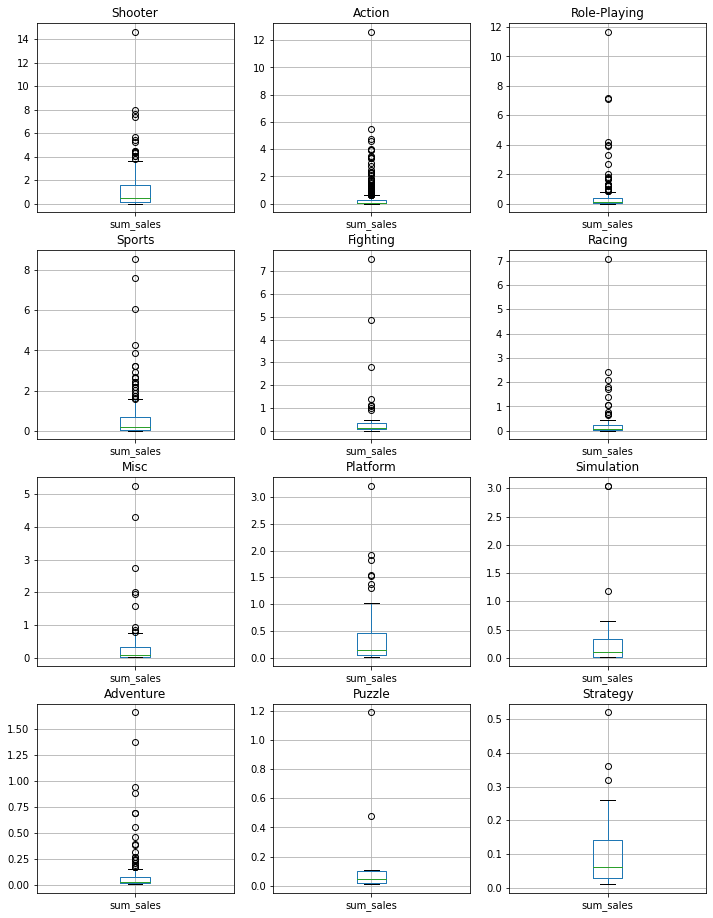

In [30]:
cnt = len(actual_df['genre'].unique())
v_cnt = int(np.ceil(cnt/3)) 
fig = plt.figure(figsize=(12, 4*v_cnt))
for i, genre in zip(range(1, cnt+1), actual_df['genre'].unique()):
    ax = fig.add_subplot(v_cnt,3,i)
    ax.title.set_text(genre)
    actual_df.query('genre == @genre').boxplot('sum_sales')

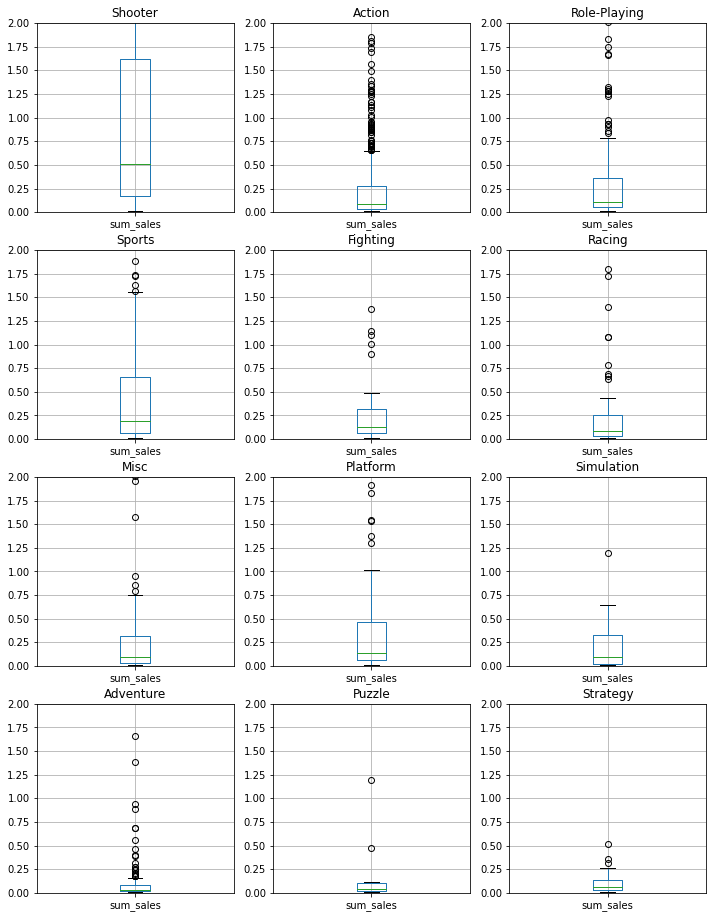

In [31]:
# уменьшим масштаб
fig = plt.figure(figsize=(12, 4*v_cnt))
for i, genre in zip(range(1, cnt+1), actual_df['genre'].unique()):
    ax = fig.add_subplot(v_cnt,3,i)
    ax.title.set_text(genre)
    plt.ylim(0,2)
    actual_df.query('genre == @genre').boxplot('sum_sales')

Можно выделить жанры спорт, шутер и экшен как популярные и продаваемые. Особо выыделяется жанр экшен, как самый продаваемый и жанры пазл, приключения и стратегии как самые непопулярный.

## Составим портрет пользователя каждого региона

Определим самые популярные платформы, самые популярные жанры, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [32]:
# Создадим функцию на вход которой подается название столбца и название заголовка,
# она создаст графики по всем параметрам за раз 
def user_portrait(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    for pivot, ax in zip(list(['eu_sales','jp_sales','na_sales']),axes):
        ppivot = actual_df.pivot_table(index=row, values=pivot, aggfunc='sum'
                  ).sort_values(by=pivot, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
        sns.barplot(data=ppivot, x=row, y=pivot, ax=ax)
        fig.suptitle(title, fontsize=15)
plt.show()
sns.set()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


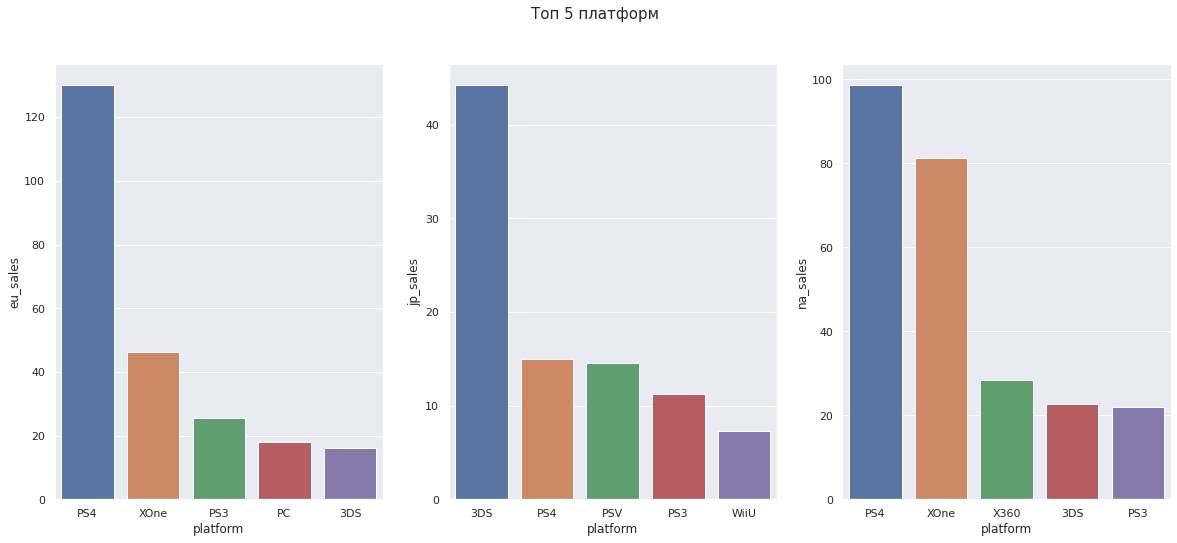

In [33]:
user_portrait('platform', 'Топ 5 платформ')

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.38
2,Fighting,6.37
3,Misc,5.59
4,Shooter,4.87


,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


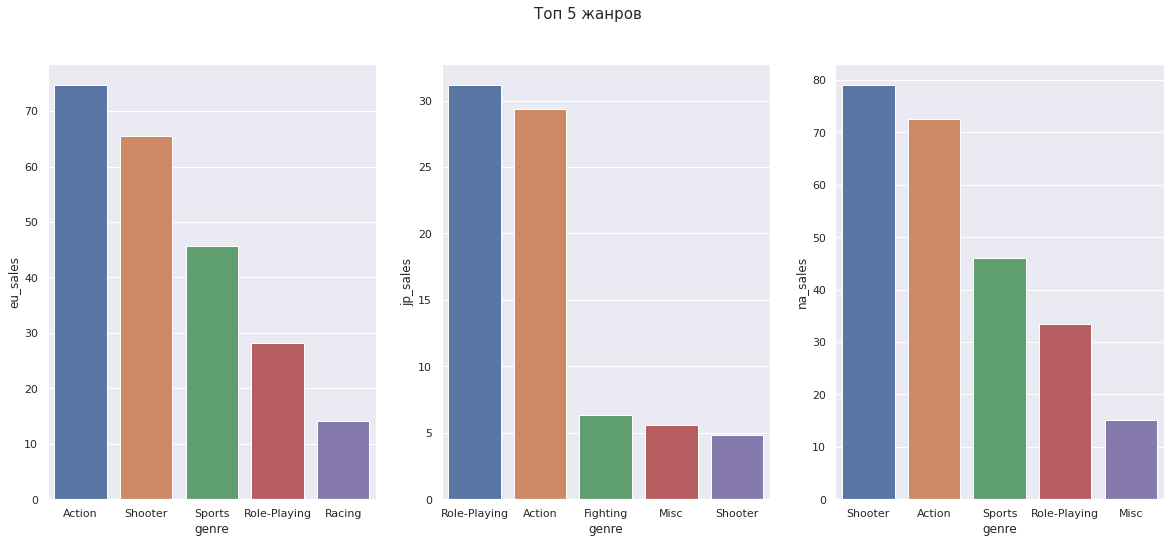

In [34]:
user_portrait('genre','Топ 5 жанров')

,rating,eu_sales
0,M,93.44
1,RP,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


,rating,jp_sales
0,RP,56.54
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


,rating,na_sales
0,M,96.42
1,RP,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


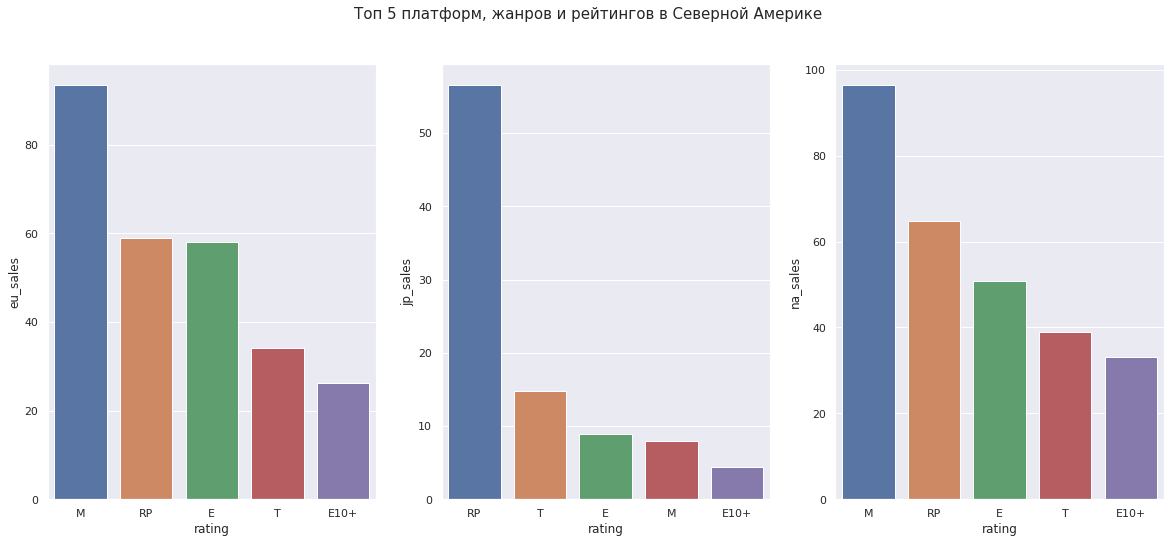

In [35]:
user_portrait('rating','Топ 5 платформ, жанров и рейтингов в Северной Америке')

Топ 5 платформ Европы - PS4, XOne, PS3, PC, 3DS

Японии - 3DS, PS4, PSV, PS3, WiiU

Северной америки - PS4, XOne, X360, 3DS, PS3

Япония выделяется любителями PSV и WiiU. Только в Европе популярен РС. И лишь Америка еще не простилась с X360. PS3, PS4 и 3DS полюбились всем регионам. Скорее всего такая разница объясняется разными культурами гейминга и доступности определенных платформ.

Топ 5 жанров Европы - Action, Shooter, Sports, Role-Playing, Racing

Японии - Role-Playing, Action, Fighting, Misc, Shooter

Северной Америки - Shooter, Action, Sports, Role-Playing, Misc

В Японии больше всего любят ролевые игры и только в Японии любят файтинги - это объясняется выходом в 2015 году tekken 7 и остальными релизами компании Bandai Namco Games. Картина Америки и Европы похожи, только в Европе популярны гонки, объяснить это можно любовью европейцев к машинам, и прекрасному европейскому машиностроению. Всем регионам нравятся ролевые игры, шутеры и экшен.

Видно, что в Японии рейтинг ESRB ставится не часто. Рейтинг E и Т имеет большею часть от продаж , чем в других регионах, в отличии от рейтинга М.

## Проверка гипотез

Первая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотезза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные.Так как нам даны данные лишь с одного магазина, а не всех продаж всех магазинов по миру проведем t-тест.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), использую его.

In [36]:
# Перед t-тестом удалим строки с пропусками в user_score чтобы не исказить исследование

actual_df.dropna(subset=['user_score'], inplace = True)
actual_df = actual_df.reset_index(drop=True)
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
883,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
884,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
885,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
886,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,RP,0.01


In [37]:
# Перед проверкой узнаем дисперсии для обоих выборок
XOne = actual_df.query('platform == "XOne"')
print(XOne['user_score'].var())
PC = actual_df.query('platform == "PC"')
print(PC['user_score'].var())

1.8910066518847013
2.901154315133451


Дисперсии отличются не сильно, применять 3 аргумент не придется.

In [38]:
XOne_rait = XOne['user_score']
PC_rait = PC['user_score']
a = st.stats.ttest_ind (XOne_rait, PC_rait)
alpha = 0.05 # # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу
print('p-значение: ' + str(a.pvalue))
if a.pvalue < alpha:
    print('Гипотеза отвергнута')
else:
    print('Первая гипотеза не может быть отвергнута')
    

p-значение: 0.10450507919348415
Первая гипотеза не может быть отвергнута


Вторая гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза -  средние пользовательские рейтинги жанров Action и Sports разные. Проведем t-тест.

In [40]:
# Перед проверкой узнаем дисперсии для обоих выборок
action = actual_df.query('genre == "Action"')
print(action['user_score'].var())
sports = actual_df.query('genre == "Sports"')
print(sports['user_score'].var())

1.8984766584766581
3.446979127609048


Дисперсии отличаются не сильно, 3 аргумент не нужен.

In [41]:
action_rait = action['user_score']
sports_rait = sports['user_score']
a = st.stats.ttest_ind (action_rait, sports_rait)
alpha = 0.05 
print('p-значение: ' + str(a.pvalue))
if a.pvalue < alpha:
    print('Вторая гипотеза не может быть отвергнута')
else:
    print('Вторая гипотеза отвергнута')

p-значение: 2.8711147985105864e-19
Вторая гипотеза не может быть отвергнута


По результатом t-теста вторая гипотеза не может быть отвергнута. Средние пользовательские рейтинги жанров Action и Sports могут быть одинаковыми. Популярность этих жанров высока, как мы могли узнать из прошлых шагов, так что не удивительно, что их рейтинги могут быть одинаковы.

## Вывод 

Платформы сменяют друг друга примерно раз в 6 лет.  По продажам пока лидируют PS3 и X360, но они падают и уступают места PS4 c XOne. Так же можно выделить 3DS и PC как платформы с хорошими продажами, особенно PC со своей 30-тилетней историей продаж. Есть игры которые продаются во много раз лучше остальных. 

Отзывы пользователей и критиков практически не влияют на популярность игр. Можно выделить жанры спорт, шутер и экшен как популярные и продаваемые. Особо выделяется жанр экшен, как самый продаваемый и жанры пазл, приключения и стратегии как самые непопулярный. 

Топ 5 платформ Европы - PS4, XOne, PS3, PC, 3DS; Японии - 3DS, PS4, PSV, PS3, WiiU; Северной америки - PS4, XOne, X360, 3DS, PS3. Топ 5 жанров Европы - Action, Shooter, Sports, Role-Playing, Racing; Японии - Role-Playing, Action, Fighting, Misc, Shooter; Северной Америки - Shooter, Action, Sports, Role-Playing, Misc. Рейтинг  ESRB влияет на продажи в Японии но при этом часто не используется. 

Пользовательские рейтинги платформ XOne u PC могут быть разными и средние пользовательские рейтинги жанров Action и Sports могут быть одинаковыми.